In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [5]:
ds = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MachineLearningII/ds_final.csv')

In [6]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       782 non-null    float64
 1   Country                    782 non-null    object 
 2   Happiness Score            782 non-null    float64
 3   GDP per Capita             782 non-null    float64
 4   Life Expectancy            782 non-null    float64
 5   Freedom                    782 non-null    float64
 6   Perceptions of corruption  782 non-null    float64
 7   Generosity                 782 non-null    float64
 8   Region                     782 non-null    object 
dtypes: float64(7), object(2)
memory usage: 55.1+ KB


In [7]:
ds.head()

,Year,Country,Happiness Score,GDP per Capita,Life Expectancy,Freedom,Perceptions of corruption,Generosity,Region
0,2015.0,Switzerland,7.587,1.39651,0.94143,0.66557,0.41978,0.29678,Western Europe
1,2015.0,Iceland,7.561,1.30232,0.94784,0.62877,0.14145,0.43630,Western Europe
2,2015.0,Denmark,7.527,1.32548,0.87464,0.64938,0.48357,0.34139,Western Europe
3,2015.0,Norway,7.522,1.45900,0.88521,0.66973,0.36503,0.34699,Western Europe
4,2015.0,Canada,7.427,1.32629,0.90563,0.63297,0.32957,0.45811,North America


In [8]:
ds.drop(['Country', 'Year'], axis=1, inplace=True)

In [20]:
# Como solo tenemos 2 clases en el tipo, vamos a transformarlo usando one hot encoding

type_dummies= pd.get_dummies(ds.Region, prefix='Region')
dataset_encoded = pd.concat([ds, type_dummies], axis=1)
print(dataset_encoded.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Happiness Score                         782 non-null    float64
 1   GDP per Capita                          782 non-null    float64
 2   Life Expectancy                         782 non-null    float64
 3   Freedom                                 782 non-null    float64
 4   Perceptions of corruption               782 non-null    float64
 5   Generosity                              782 non-null    float64
 6   Region                                  782 non-null    object 
 7   Region_Australia and New Zealand        782 non-null    uint8  
 8   Region_Central and Eastern Europe       782 non-null    uint8  
 9   Region_Eastern Asia                     782 non-null    uint8  
 10  Region_Latin America and Caribbean      782 non-null    uint8 

In [21]:
dataset_encoded.drop(['Region'], axis=1, inplace=True)

In [22]:
dataset_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Happiness Score                         782 non-null    float64
 1   GDP per Capita                          782 non-null    float64
 2   Life Expectancy                         782 non-null    float64
 3   Freedom                                 782 non-null    float64
 4   Perceptions of corruption               782 non-null    float64
 5   Generosity                              782 non-null    float64
 6   Region_Australia and New Zealand        782 non-null    uint8  
 7   Region_Central and Eastern Europe       782 non-null    uint8  
 8   Region_Eastern Asia                     782 non-null    uint8  
 9   Region_Latin America and Caribbean      782 non-null    uint8  
 10  Region_Middle East and Northern Africa  782 non-null    uint8 

In [12]:
categoricas = ['Region']
numericas = ['GDP per Capita', 'Life Expectancy','Freedom', 'Perceptions of corruption', 'Generosity']
output =  ['Happiness Score']

In [23]:
features = ['Region_Australia and New Zealand', 
            'Region_Central and Eastern Europe', 
            'Region_Eastern Asia', 
            'Region_Latin America and Caribbean', 
            'Region_Middle East and Northern Africa', 
            'Region_North America', 
            'Region_Southeastern Asia', 
            'Region_Southern Asia', 
            'Region_Sub-Saharan Africa', 
            'Region_Western Europe',
            'GDP per Capita', 
            'Life Expectancy',
            'Freedom', 
            'Perceptions of corruption', 
            'Generosity']

In [24]:
dataset_encoded.head()

,Happiness Score,GDP per Capita,Life Expectancy,Freedom,Perceptions of corruption,Generosity,Region_Australia and New Zealand,Region_Central and Eastern Europe,Region_Eastern Asia,Region_Latin America and Caribbean,Region_Middle East and Northern Africa,Region_North America,Region_Southeastern Asia,Region_Southern Asia,Region_Sub-Saharan Africa,Region_Western Europe
0,7.587,1.39651,0.94143,0.66557,0.41978,0.29678,0,0,0,0,0,0,0,0,0,1
1,7.561,1.30232,0.94784,0.62877,0.14145,0.43630,0,0,0,0,0,0,0,0,0,1
2,7.527,1.32548,0.87464,0.64938,0.48357,0.34139,0,0,0,0,0,0,0,0,0,1
3,7.522,1.45900,0.88521,0.66973,0.36503,0.34699,0,0,0,0,0,0,0,0,0,1
4,7.427,1.32629,0.90563,0.63297,0.32957,0.45811,0,0,0,0,0,1,0,0,0,0


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [25]:
x_train, x_test, y_train, y_test = train_test_split(
    dataset_encoded[features], 
    dataset_encoded[output],  
    test_size=0.3,
    random_state=42)

In [26]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(547, 15)
(547, 1)
(235, 15)
(235, 1)


In [46]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [47]:
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42, eval_metric=mean_squared_error, )

In [ ]:
xgb_model

In [27]:
xgb_model.fit(x_train, y_train)

[01:17:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [28]:
y_pred = xgb_model.predict(x_test)

In [35]:
np.sqrt(y_pred.reshape(-1,1)-y_test)

,Happiness Score
596,-0.052210
588,0.193700
208,0.003934
291,0.967235
174,-0.723379
...,...
393,0.084522
227,0.276148
212,-0.914898
581,0.594070


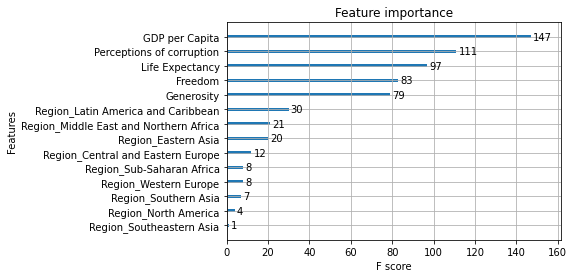

In [38]:
xgb.plot_importance(xgb_model)

In [60]:
# Entrenamiento de modelos de prueba
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import balanced_accuracy_score

def pipeline_ml_models(preprocessing_pipeline):
  # Modelos a ensayar.
  models = [
      ("RandomForest", 
          Pipeline([
              ('preprocessor', preprocessing_pipeline),
              ('model', RandomForestRegressor(n_estimators=200, random_state=42)) 
          ])
      ),
      
      ("Adaboost", 
          Pipeline([
              ('preprocessor', preprocessing_pipeline),
              ('model', AdaBoostRegressor(n_estimators=200, random_state=42)) 
          ])
      ),
      
      ("LinearRegression", 
          Pipeline([
              ('preprocessor', preprocessing_pipeline),
              ('model', LinearRegression())
          ])
      ),
      
      ("LinearRegression_Ridge", 
          Pipeline([
              ('preprocessor', preprocessing_pipeline),
              ('model', Ridge(alpha = 0.001))
          ])
      ),

      ("XGBRegressor", 
          Pipeline([
              ('preprocessor', preprocessing_pipeline),
              ('model', xgb.XGBRegressor(objective="reg:linear", random_state=42))
          ])
      ),
      
  ]
  
  return models

In [52]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [61]:
preprocessing_pipeline = ColumnTransformer(
             transformers=[
                           #('categoric', OneHotEncoder(handle_unknown='ignore'),categoricas),
                           ("numerical", MinMaxScaler(), numericas)
              ],
              remainder='passthrough'
)

model = pipeline_ml_models(preprocessing_pipeline)

In [54]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.base import clone
from sklearn.metrics import mean_squared_error

def kfold_pipeline(models_pipeline, samples , target, x_test, y_test, k = 15):
    
    """
    Esta funcion recibe:
        models_pipeline: el pipeline de los modelos a evaluar
        samples: set de entrenamiento
        target: salidas del set de entrenamiento
        x_test: set de testeo
        y_test: set de testeo
        k: el numero de segmentos que utilizara el algoritmo de K-Fold
    """
    results = {}
    for model in models_pipeline:
        model_name = model[0]
        results[model_name] = {}
        
        train_mse = 0
        valid_mse = 0
        
        kf = KFold(n_splits=k)
        kf.get_n_splits(samples)
        
        for train_index, valid_index in kf.split(samples, target):
            x_valid = samples.iloc[valid_index]
            y_valid = target.iloc[valid_index]
            x_train = samples.iloc[train_index]
            y_train = target.iloc[train_index]
            
            model[1].fit(x_train, np.ravel(y_train))
            pred_train = model[1].predict(x_train)
            pred_valid = model[1].predict(x_valid)        
           
            if len(pred_train.shape)>1 and (pred_train.shape[1]>1):
                train_mse = train_mse + mean_squared_error(y_train, pred_train.reshape(-1,1)) / k
                valid_mse = valid_mse + mean_squared_error(y_valid, pred_valid.reshape(-1,1)) / k
            else:
                train_mse = train_mse + mean_squared_error(y_train, pred_train.reshape(-1,1)) / k
                valid_mse = valid_mse + mean_squared_error(y_valid, pred_valid.reshape(-1,1)) / k
        
        pred_test = model[1].predict(x_test)

        results[model_name]["Train"] = train_mse
        results[model_name]["Valid"] = valid_mse
        results[model_name]["Test"] = mean_squared_error(y_test, pred_test.reshape(-1,1))

    models_results = pd.DataFrame(results).T
    return models_results

In [62]:
features_1 = ['Region', 'GDP per Capita', 'Life Expectancy',
            'Freedom', 'Perceptions of corruption', 'Generosity']

x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(
    ds[features_1], 
    ds[output],  
    test_size=0.3,
    random_state=42)

In [63]:
res = kfold_pipeline(model, x_train, y_train, x_test, y_test, k = 5)

[01:45:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:45:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:45:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:45:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:45:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


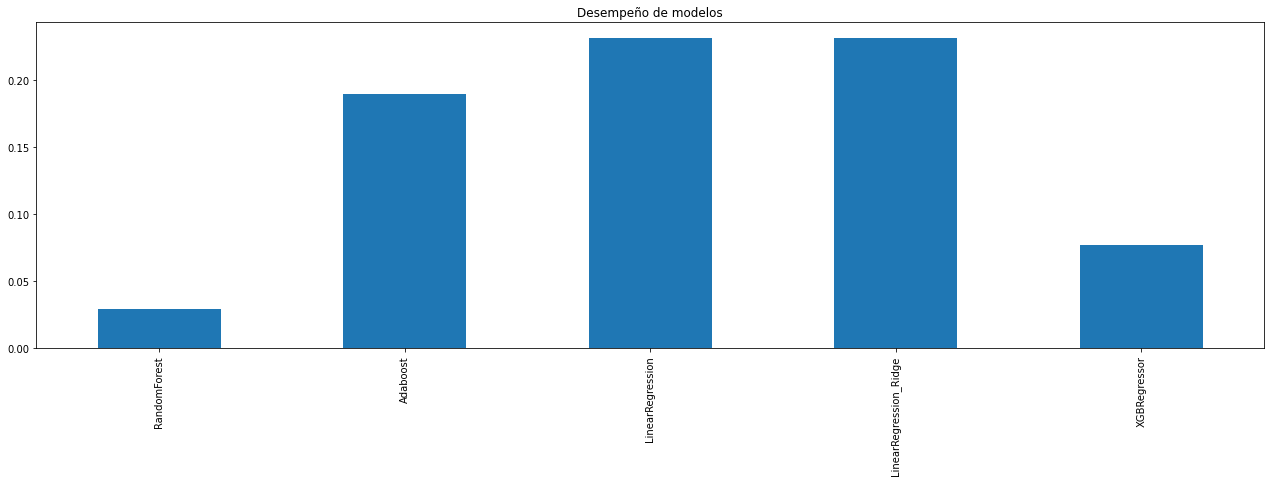

In [64]:
res['Train'].plot.bar(title="Desempeño de modelos",figsize=(22,6))

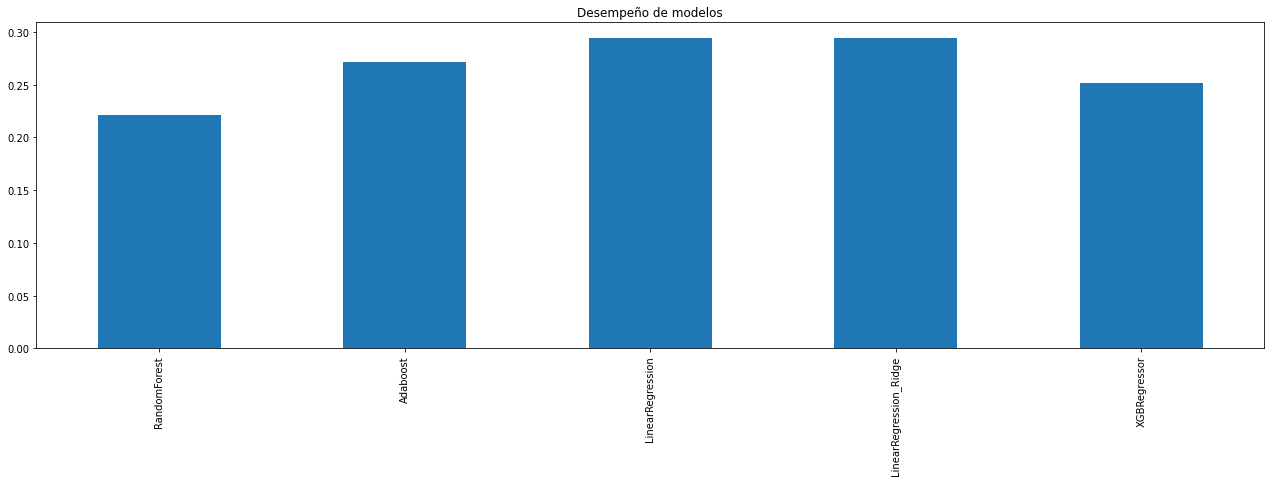

In [65]:
res['Test'].plot.bar(title="Desempeño de modelos",figsize=(22,6))